<a href="https://colab.research.google.com/github/Nihadkaipalli/Time-Series-Modelling-Case-Study/blob/main/Final_Code_V_1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Data Analysis and Visualization Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical Modeling Libraries
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

# Machine Learning Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from itertools import product

# Utility Libraries
from tqdm import tqdm
from google.colab import drive


from tqdm.notebook import tqdm_notebook
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

In [2]:
"""# 2.Load and Inspect the Dataset"""

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Loading Datasets

In [3]:
JJ_Path = '/content/drive/My Drive/Research Topics Assignment 2/jj.csv'
Amazon_Path = '/content/drive/My Drive/Research Topics Assignment 2/AMZN.csv'

# Load Amazon data
Amazon_df = pd.read_csv(Amazon_Path, low_memory=False)
Amazon_df['Date']=pd.to_datetime(Amazon_df['Date'])
Amazon_df.set_index('Date',inplace=True)

Amazon_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-20,72.324501,74.438499,72.324501,73.417503,73.417503,129984000
2018-02-21,74.250000,75.174500,73.945999,74.146004,74.146004,126088000
2018-02-22,74.767998,75.126999,73.788002,74.266998,74.266998,97162000
2018-02-23,74.766998,75.000000,74.324997,75.000000,75.000000,88362000
2018-02-26,75.459999,76.141998,75.349998,76.097504,76.097504,99100000
...,...,...,...,...,...,...
2023-02-13,97.849998,99.680000,96.910004,99.540001,99.540001,52841500
2023-02-14,98.410004,100.919998,97.519997,99.699997,99.699997,56202900
2023-02-15,99.089996,101.169998,98.449997,101.160004,101.160004,48053900


In [4]:
# Load Johnson and Johnson data
jj_df = pd.read_csv(JJ_Path, low_memory=False)
jj_df

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61
...,...,...
79,1979-10-01,9.99
80,1980-01-01,16.20
81,1980-04-01,14.67
82,1980-07-02,16.02


## Amazon Monthly Average Close Price

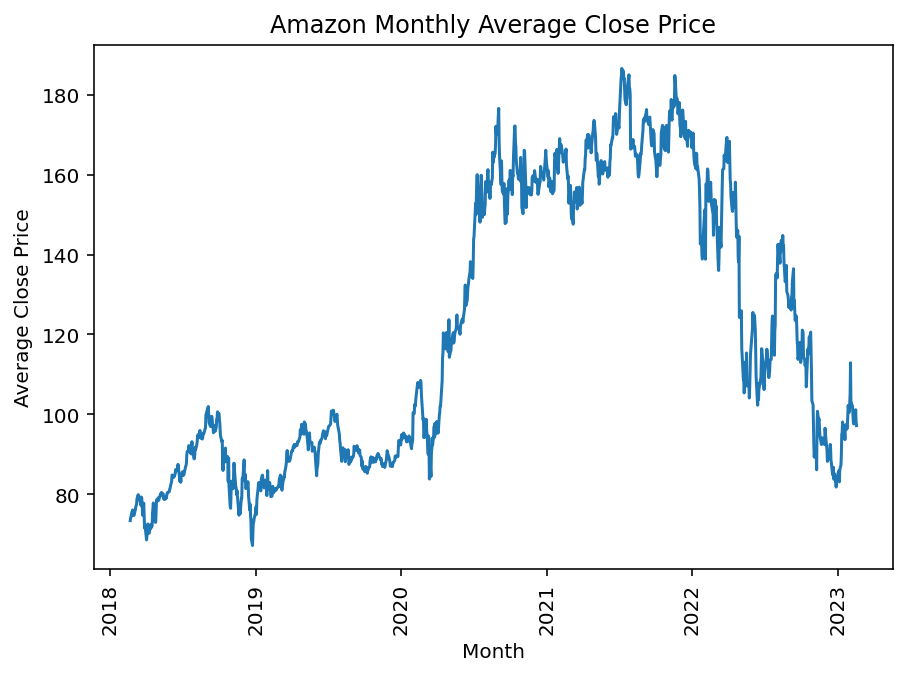

In [5]:
# Plot
fig, ax = plt.subplots(dpi=144)
plt.plot(Amazon_df['Close'])
plt.title('Amazon Monthly Average Close Price')
plt.xlabel('Month')
plt.ylabel('Average Close Price')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## J&J and Amazon sales data

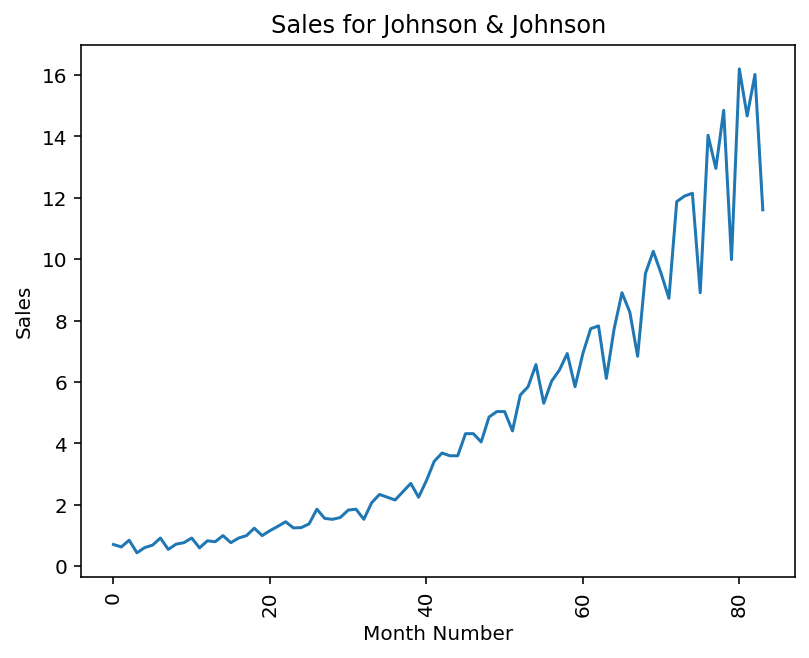

In [6]:
# Plot for johnson and johnson data
fig, ax = plt.subplots(dpi=144)
plt.plot(jj_df['data'])
plt.title('Sales for Johnson & Johnson')
plt.ylabel('Sales')
plt.xlabel('Month Number')
plt.xticks(rotation=90)
plt.show()

## ACF and PACF

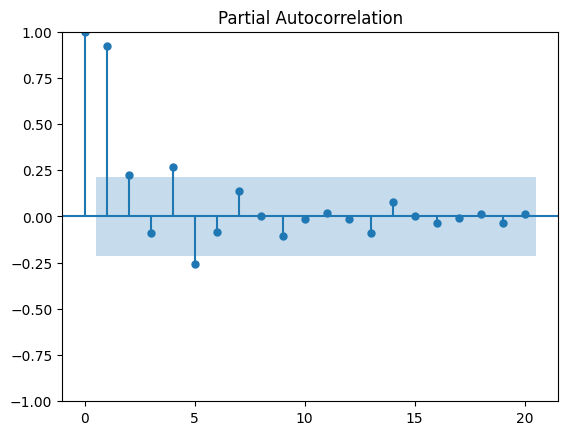

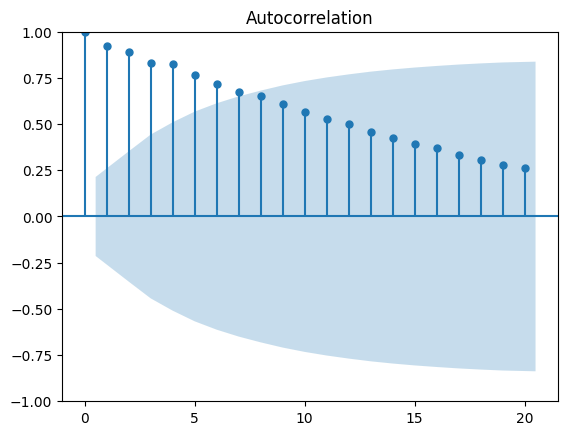

In [7]:
# plot the ACF and PACF for Johnson and Johnson
plot_pacf(jj_df['data']);
plot_acf(jj_df['data']);
plt.show()

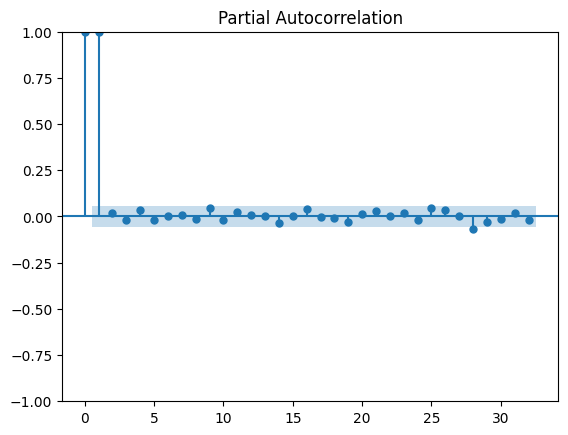

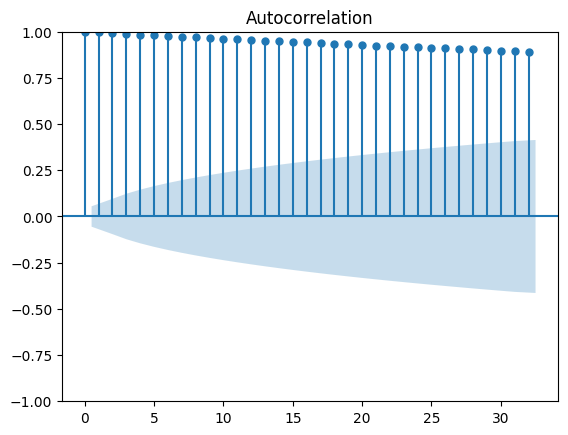

In [8]:
# plot the ACF and PACF for Amazon
plot_pacf(Amazon_df['Close']);
plot_acf(Amazon_df['Close']);
plt.show()

## ADF Test for stationarity

In [9]:
# Perform ADF test
result = adfuller(jj_df['data'])

# Print ADF Statistic and p-value
print(f"ADF Statistic: {result[0]}")
print(f"P-value: {result[1]}")

ADF Statistic: 2.7420165734574744
P-value: 1.0


In [10]:
# Perform ADF test
result = adfuller(Amazon_df['Close'])

# Print ADF Statistic and p-value
print(f"ADF Statistic: {result[0]}")
print(f"P-value: {result[1]}")

ADF Statistic: -1.6578089913331728
P-value: 0.45297105465166737


## **Log transform**

In [11]:
# Take log and first difference
jj_df['data_tr_1'] = np.log(jj_df['data']).diff()

# Display the first 10 rows
jj_df.head(10)

,date,data,data_tr_1
0,1960-01-01,0.71,NaN
1,1960-04-01,0.63,-0.119545
2,1960-07-02,0.85,0.299517
3,1960-10-01,0.44,-0.658462
4,1961-01-01,0.61,0.326684
5,1961-04-02,0.69,0.123233
6,1961-07-02,0.92,0.287682
7,1961-10-01,0.55,-0.514455
8,1962-01-01,0.72,0.269333
9,1962-04-02,0.77,0.067139


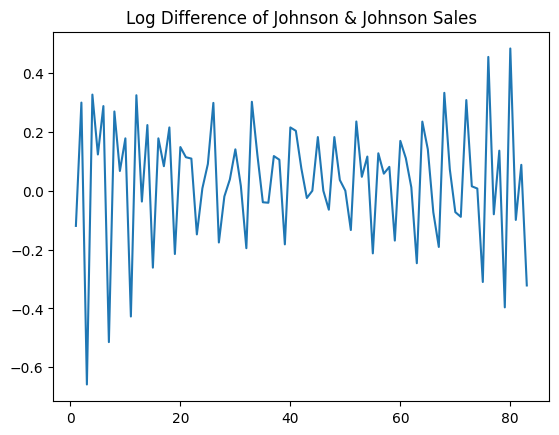

In [12]:
plt.plot(jj_df['data_tr_1'])
plt.title("Log Difference of Johnson & Johnson Sales")
plt.show()

In [13]:
# Take log and first difference
Amazon_df['data_tr_1'] = np.log(Amazon_df['Close']).diff()

# Display the first 10 rows
Amazon_df.head(10)

,Open,High,Low,Close,Adj Close,Volume,data_tr_1
Date,,,,,,,
2018-02-20,72.324501,74.438499,72.324501,73.417503,73.417503,129984000,NaN
2018-02-21,74.250000,75.174500,73.945999,74.146004,74.146004,126088000,0.009874
2018-02-22,74.767998,75.126999,73.788002,74.266998,74.266998,97162000,0.001631
2018-02-23,74.766998,75.000000,74.324997,75.000000,75.000000,88362000,0.009821
2018-02-26,75.459999,76.141998,75.349998,76.097504,76.097504,99100000,0.014527
2018-02-27,76.224998,76.338997,75.360497,75.598999,75.598999,96176000,-0.006572
2018-02-28,75.975502,76.434998,75.599998,75.622498,75.622498,90300000,0.000311
2018-03-01,75.680000,75.924500,73.250000,74.672501,74.672501,136704000,-0.012642
2018-03-02,73.455002,75.052498,72.750504,75.012497,75.012497,131752000,0.004543


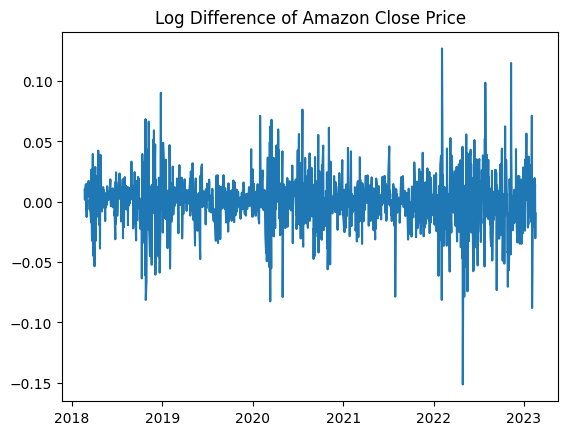

In [14]:
plt.plot(Amazon_df['data_tr_1'])
plt.title("Log Difference of Amazon Close Price")
plt.show()

## **ADF Retest**

In [15]:
# Perform ADF test on differenced data
result = adfuller(jj_df['data_tr_1'].dropna())

# Print results
print(f"ADF Statistic: {result[0]}")
print(f"P-value: {result[1]}")

ADF Statistic: -4.317043945811837
P-value: 0.00041497314044406584


In [16]:
# Perform ADF test on differenced data
result = adfuller(Amazon_df['data_tr_1'].dropna())

# Print results
print(f"ADF Statistic: {result[0]}")
print(f"P-value: {result[1]}")

ADF Statistic: -36.639832812749425
P-value: 0.0


## **retest ACF & PCF Plot**

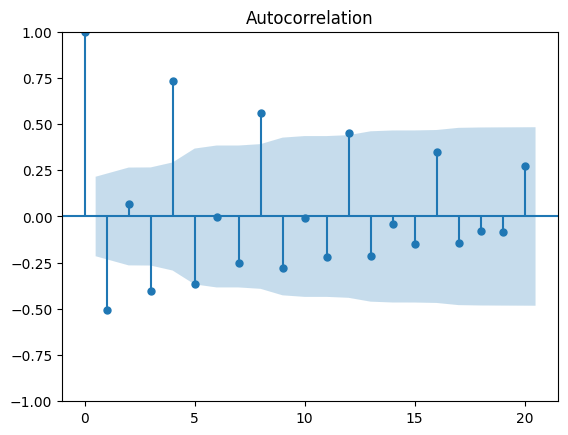

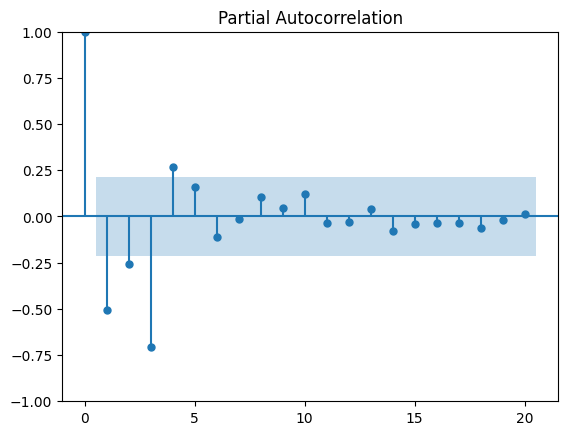

In [17]:
plot_acf(jj_df['data_tr_1'][1:]);
plot_pacf(jj_df['data_tr_1'][1:]);
plt.show()

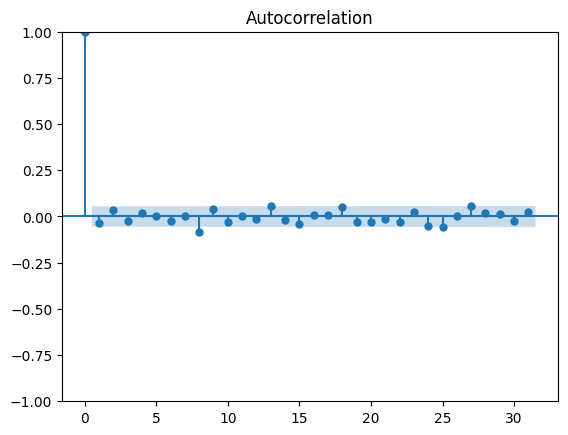

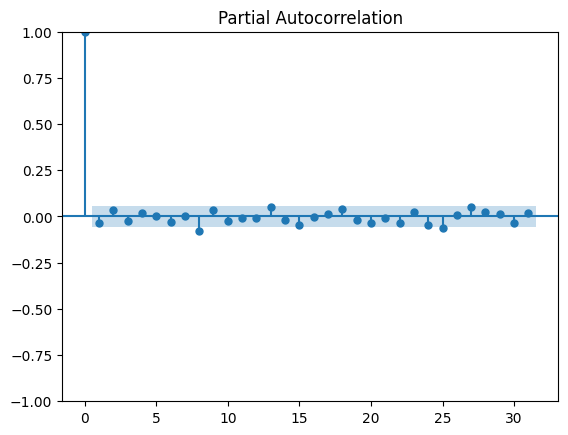

In [18]:
plot_acf(Amazon_df['data_tr_1'][1:]);
plot_pacf(Amazon_df['data_tr_1'][1:]);
plt.show()

# ARIMA

## **JJ**

In [19]:
# define model
# p,d,q ARIMA Model
#model = ARIMA(y, order=(1,0,1))
#model is a particular model with the p,d,q parameters specified

model = ARIMA(jj_df['data'], order=(3,1,3))

In [20]:
# record teh best model fit in a parameter called model_fit
model_fit = model.fit()

In [21]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                   data   No. Observations:                   84
Model:                 ARIMA(3, 1, 3)   Log Likelihood                 -76.286
Date:                Fri, 11 Apr 2025   AIC                            166.572
Time:                        05:16:48   BIC                            183.504
Sample:                             0   HQIC                           173.374
                                 - 84                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0311      0.036    -28.924      0.000      -1.101      -0.961
ar.L2         -1.0273      0.043    -23.892      0.000      -1.112      -0.943
ar.L3         -0.9768      0.030    -32.190      0.0

In [22]:
def optimize_arima_models(endog, order_list):
    """
        Return dataframe with parameters and corresponding AIC

        order_list - list with (p, d, q) tuples
        endog - the observed variable, in this case data['data']
    """

    results = []

    for order in tqdm_notebook(order_list):
        try:
            model = ARIMA(endog, order=order)
            model_fit = model.fit()
        except:
            continue

        aic = model_fit.aic
        results.append([order, model_fit.aic])

    result_df = pd.DataFrame(results)
    result_df.columns = ['(p, d, q)', 'AIC']
    # Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)

    return result_df

In [23]:
# Define ranges for p and q
ps = range(0, 8)
qs = range(0, 8)

# Create a list of (p, d, q) tuples, where d is always 1
order_list = [(p, 1, q) for p, q in product(ps, qs)]

# Print out the first few rows of order_list
order_list[:10]

[(0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 1, 6),
 (0, 1, 7),
 (1, 1, 0),
 (1, 1, 1)]

In [24]:
# Call optimize_arima_models
optimized_results = optimize_arima_models(jj_df['data'], order_list)

# Print out the ordered list with the best model at the top
optimized_results


  0%|          | 0/64 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWar

,"(p, d, q)",AIC
0,"(6, 1, 3)",115.297318
1,"(4, 1, 6)",115.859233
2,"(7, 1, 1)",116.050450
3,"(5, 1, 3)",116.536224
4,"(5, 1, 4)",117.242599
...,...,...
59,"(0, 1, 1)",265.481216
60,"(0, 1, 3)",265.497398
61,"(1, 1, 0)",266.632563
62,"(2, 1, 0)",267.751437


In [25]:
# re-define the best fit model variant.
# We do this as the last 'model_fit' recorded will be for the (7,1,7) variant.



# p,d,q ARIMA Model
# Define the best model
best_arima_model = ARIMA(jj_df['data'], order=(6, 1, 3))

# Fit the best model
best_arima_fit = best_arima_model.fit()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [26]:
#summary of the model
print(best_arima_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                   data   No. Observations:                   84
Model:                 ARIMA(6, 1, 3)   Log Likelihood                 -47.649
Date:                Fri, 11 Apr 2025   AIC                            115.297
Time:                        05:17:28   BIC                            139.486
Sample:                             0   HQIC                           125.015
                                 - 84                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4733      0.127    -11.640      0.000      -1.721      -1.225
ar.L2         -0.7728      0.148     -5.235      0.000      -1.062      -0.484
ar.L3          0.0382      0.063      0.610      0.5

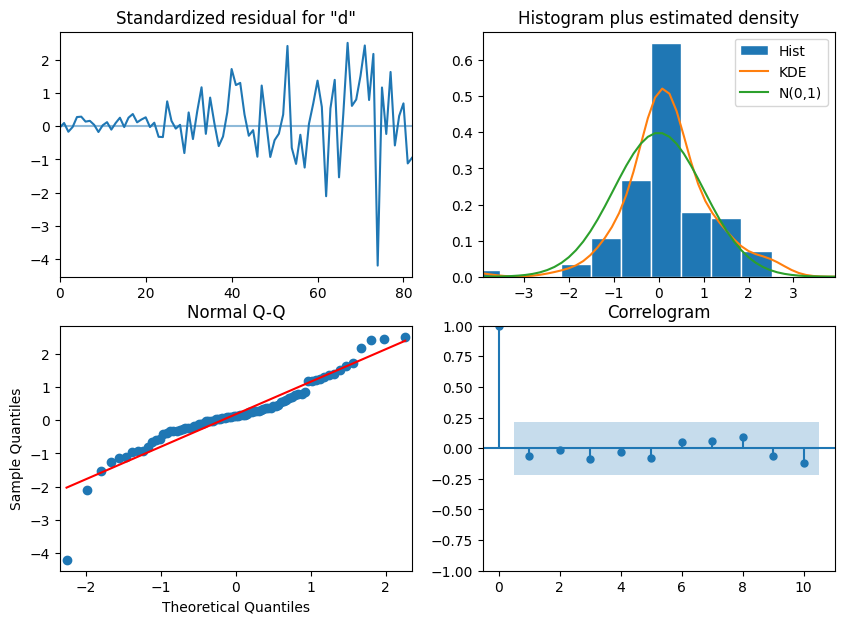

In [27]:
best_arima_fit.plot_diagnostics(figsize=(10,7))
plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


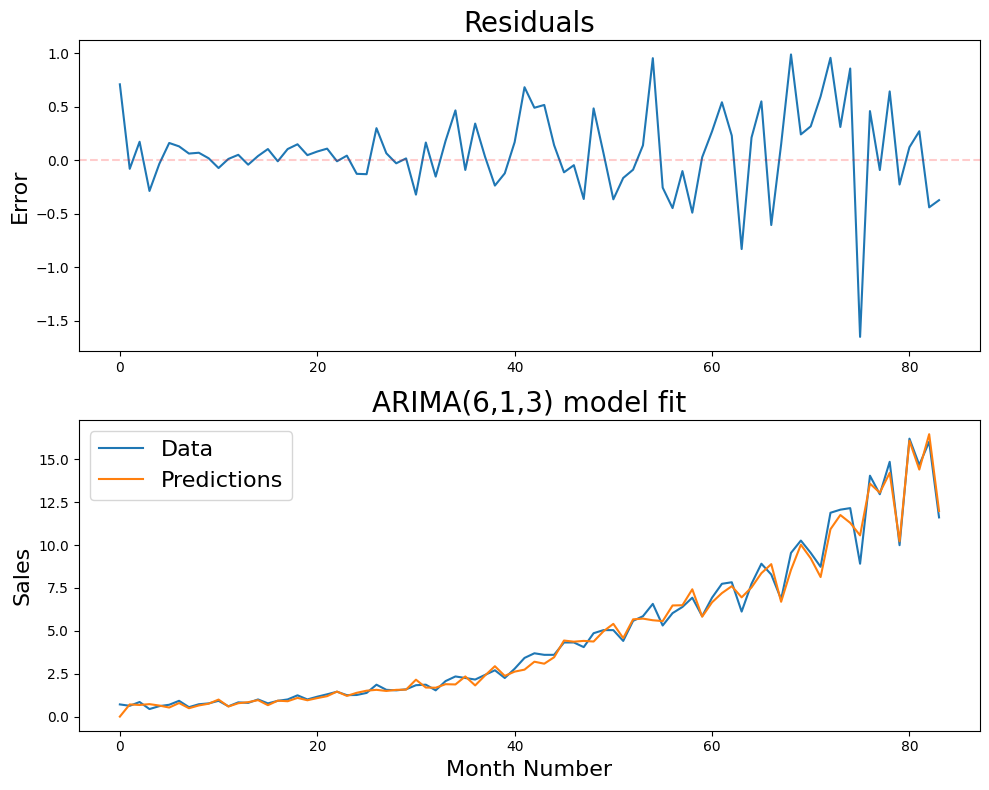

In [28]:
#get prediction start and end dates
test_data_jj = jj_df['data']

pred_start_date = test_data_jj.index[0]
pred_end_date = test_data_jj.index[-1]

#get the predictions and residuals
predictions_jj = best_arima_model.fit().predict(start=pred_start_date, end=pred_end_date)
residuals_jj = test_data_jj - predictions_jj

# Create figure and axes
fig = plt.figure(figsize=(10, 8))

# First subplot for residuals
plt.subplot(2, 1, 1)
plt.plot(residuals_jj)
plt.title('Residuals', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)

# Second subplot for data and predictions
plt.subplot(2, 1, 2)
plt.plot(test_data_jj, label='Data')
plt.plot(predictions_jj, label='Predictions')
plt.legend(fontsize=16)
plt.title('ARIMA(6,1,3) model fit', fontsize=20)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Month Number', fontsize=16)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [29]:
def calculate_forecast_summary(predictions, actual_values):
    # Calculate accuracy metrics
    mape = np.mean(np.abs(predictions - actual_values) / np.abs(actual_values))  # MAPE
    me = np.mean(predictions - actual_values)  # ME
    mae = np.mean(np.abs(predictions - actual_values))  # MAE
    mpe = np.mean((predictions - actual_values) / actual_values)  # MPE
    rmse = np.sqrt(np.mean((predictions - actual_values) ** 2))  # RMSE
    corr = np.corrcoef(predictions, actual_values)[0, 1]  # correlation coefficient
    mins = np.amin(np.vstack([predictions, actual_values]), axis=0)
    maxs = np.amax(np.vstack([predictions, actual_values]), axis=0)
    minmax = 1 - np.mean(mins / maxs)  # minmax normalization

    return {
        'mape': mape, 'me': me, 'mae': mae,
        'mpe': mpe, 'rmse': rmse, 'corr': corr, 'minmax': minmax
    }

In [30]:
calculate_forecast_summary(predictions_jj, test_data_jj)

{'mape': np.float64(0.08945519428653988),
 'me': np.float64(-0.07906178477112123),
 'mae': np.float64(0.2789680779228482),
 'mpe': np.float64(-0.027613316081548874),
 'rmse': np.float64(0.3999081195935732),
 'corr': np.float64(0.9958097298551797),
 'minmax': np.float64(0.08437238270774561)}

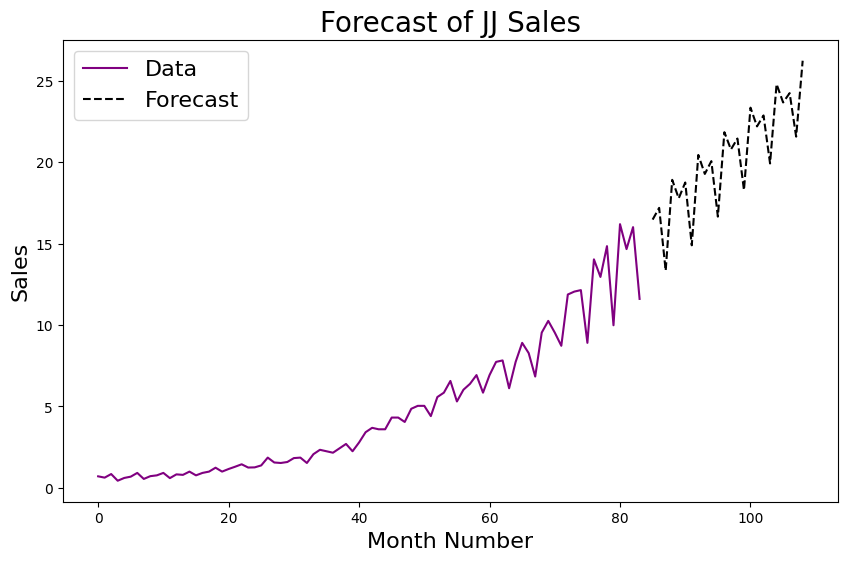

In [31]:
# Forecast version 1: get_prediction()
n_forecast = 24  # 24 months

# Get prediction
predict = best_arima_fit.get_prediction(end=best_arima_fit.nobs + n_forecast)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(jj_df['data'], label='Data', color='purple')
plt.plot(np.arange(len(predict.predicted_mean))[-n_forecast:], predict.predicted_mean[-n_forecast:], 'k--', label='Forecast')

plt.xlabel('Month Number', fontsize=16)
plt.ylabel('Sales', fontsize=16)
plt.title('Forecast of JJ Sales', fontsize=20)
plt.legend(fontsize=16)
plt.show()


In [32]:
# Make the predictions for 24 steps ahead
forecast_results = best_arima_fit.get_forecast(steps=26)

# Get predicted values
print("forecast_results",forecast_results.predicted_mean)

# get a better view
print("\n forecast_results conf",forecast_results.conf_int())


forecast_results 84     17.336626
85     16.481965
86     17.203514
87     13.344421
88     18.924689
89     17.790273
90     18.762096
91     14.903689
92     20.454214
93     19.287892
94     20.073415
95     16.665126
96     21.852013
97     20.791878
98     21.462165
99     18.293448
100    23.359138
101    22.208205
102    22.880354
103    19.931084
104    24.803844
105    23.679476
106    24.251458
107    21.579830
108    26.242558
109    25.122279
Name: predicted_mean, dtype: float64

 forecast_results conf      lower data  upper data
84    16.565851   18.107401
85    15.687898   17.276032
86    16.341313   18.065716
87    12.481034   14.207809
88    17.509056   20.340322
89    16.346398   19.234148
90    17.212370   20.311821
91    13.320640   16.486737
92    18.460356   22.448071
93    17.212097   21.363686
94    17.883882   22.262948
95    14.400108   18.930145
96    19.188847   24.515178
97    18.027829   23.555927
98    18.541073   24.383257
99    15.273616   21.313280
100 

In [33]:
# add the predicted mean column in

jj_conf_df = pd.concat([forecast_results.predicted_mean, forecast_results.conf_int()], axis = 1)

jj_conf_df.head()

,predicted_mean,lower data,upper data
84,17.336626,16.565851,18.107401
85,16.481965,15.687898,17.276032
86,17.203514,16.341313,18.065716
87,13.344421,12.481034,14.207809
88,18.924689,17.509056,20.340322


In [34]:
# change the name of the column heads

jj_conf_df = jj_conf_df.rename(columns={'predicted_mean': 'Predictions', 'lower data': 'Lower CI', 'upper data': 'Upper CI'})
jj_conf_df.head()

,Predictions,Lower CI,Upper CI
84,17.336626,16.565851,18.107401
85,16.481965,15.687898,17.276032
86,17.203514,16.341313,18.065716
87,13.344421,12.481034,14.207809
88,18.924689,17.509056,20.340322


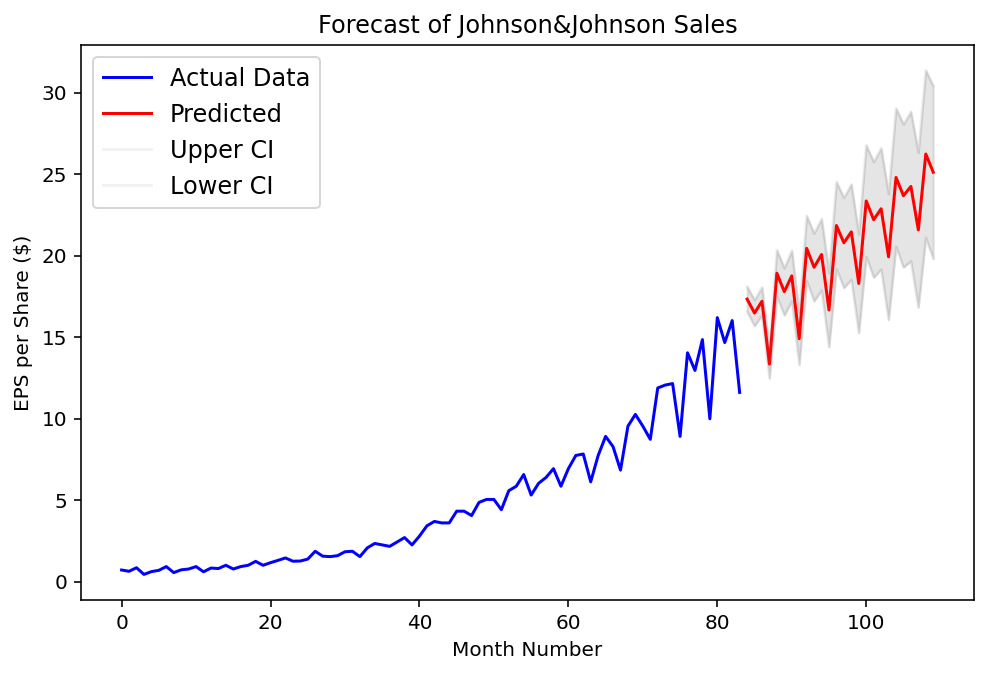

In [35]:
import matplotlib.pyplot as plt

# Create the plot
fig, ax = plt.subplots(figsize=(8, 5), dpi=144)

# Plot the original data
ax.plot(jj_df['data'], 'b', label='Actual Data')

# Plot the predicted values and confidence intervals
jj_conf_df['Predictions'].plot(color='red', label='Predicted', ax=ax)
ax.fill_between(jj_conf_df.index.values, jj_conf_df['Lower CI'], jj_conf_df['Upper CI'], color='grey', alpha=0.2)
ax.plot(jj_conf_df.index.values, jj_conf_df['Upper CI'], color='grey', label='Upper CI', alpha=0.1)
ax.plot(jj_conf_df.index.values, jj_conf_df['Lower CI'], color='grey', label='Lower CI', alpha=0.1)

# Set plot titles and labels
ax.set(title='Forecast of Johnson&Johnson Sales', xlabel='Month Number', ylabel='EPS per Share ($)')
ax.legend(loc='upper left', fontsize=12)

# Show the plot
plt.show()


## **AMAZON**

In [36]:
# define model
# p,d,q ARIMA Model
#model = ARIMA(y, order=(1,0,1))
#model is a particular model with the p,d,q parameters specified

model = ARIMA(Amazon_df['Close'], order=(3,1,3))

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [37]:
# record teh best model fit in a parameter called model_fit
model_fit = model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [38]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1259
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -3055.652
Date:                Fri, 11 Apr 2025   AIC                           6125.305
Time:                        05:17:32   BIC                           6161.266
Sample:                             0   HQIC                          6138.820
                               - 1259                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7321      0.062    -11.836      0.000      -0.853      -0.611
ar.L2          0.6699      0.102      6.538      0.000       0.469       0.871
ar.L3          0.9210      0.060     15.446      0.0

In [39]:
def optimize_arima_models(endog, order_list):
    """
        Return dataframe with parameters and corresponding AIC

        order_list - list with (p, d, q) tuples
        endog - the observed variable, in this case data['data']
    """

    results = []

    for order in tqdm_notebook(order_list):
        try:
            model = ARIMA(endog, order=order)
            model_fit = model.fit()
        except:
            continue

        aic = model_fit.aic
        results.append([order, model_fit.aic])

    result_df = pd.DataFrame(results)
    result_df.columns = ['(p, d, q)', 'AIC']
    # Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)

    return result_df

In [40]:
# Define ranges for p and q
ps = range(0, 8)
qs = range(0, 8)

# Create a list of (p, d, q) tuples, where d is always 1
order_list = [(p, 1, q) for p, q in product(ps, qs)]

# Print out the first few rows of order_list
order_list[:10]

[(0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 1, 6),
 (0, 1, 7),
 (1, 1, 0),
 (1, 1, 1)]

In [41]:
# Call optimize_arima_models
optimized_results = optimize_arima_models(Amazon_df['Close'], order_list)

# Print out the ordered list with the best model at the top
optimized_results


  0%|          | 0/64 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


,"(p, d, q)",AIC
0,"(2, 1, 2)",6122.315476
1,"(3, 1, 2)",6124.039832
2,"(2, 1, 3)",6124.044468
3,"(3, 1, 3)",6125.304890
4,"(4, 1, 2)",6125.951759
...,...,...
59,"(0, 1, 7)",6138.374108
60,"(7, 1, 0)",6138.584491
61,"(4, 1, 7)",6138.645273
62,"(7, 1, 7)",6139.511615


In [42]:
# re-define the best fit model variant.
# We do this as the last 'model_fit' recorded will be for the (7,1,7) variant.



# p,d,q ARIMA Model
# Define the best model
best_arima_model = ARIMA(Amazon_df['Close'], order=(2, 1, 2))

# Fit the best model
best_arima_fit = best_arima_model.fit()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [43]:
#summary of the model
print(best_arima_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1259
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -3056.158
Date:                Fri, 11 Apr 2025   AIC                           6122.315
Time:                        05:20:19   BIC                           6148.002
Sample:                             0   HQIC                          6131.969
                               - 1259                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6946      0.015   -111.813      0.000      -1.724      -1.665
ar.L2         -0.9604      0.015    -64.728      0.000      -0.989      -0.931
ma.L1          1.6972      0.011    152.237      0.0

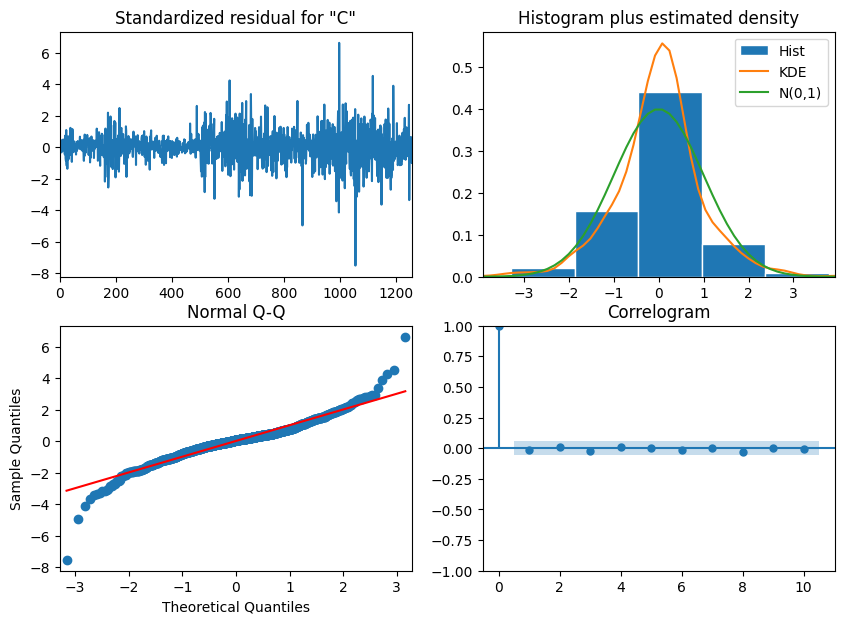

In [44]:
best_arima_fit.plot_diagnostics(figsize=(10,7))
plt.show()

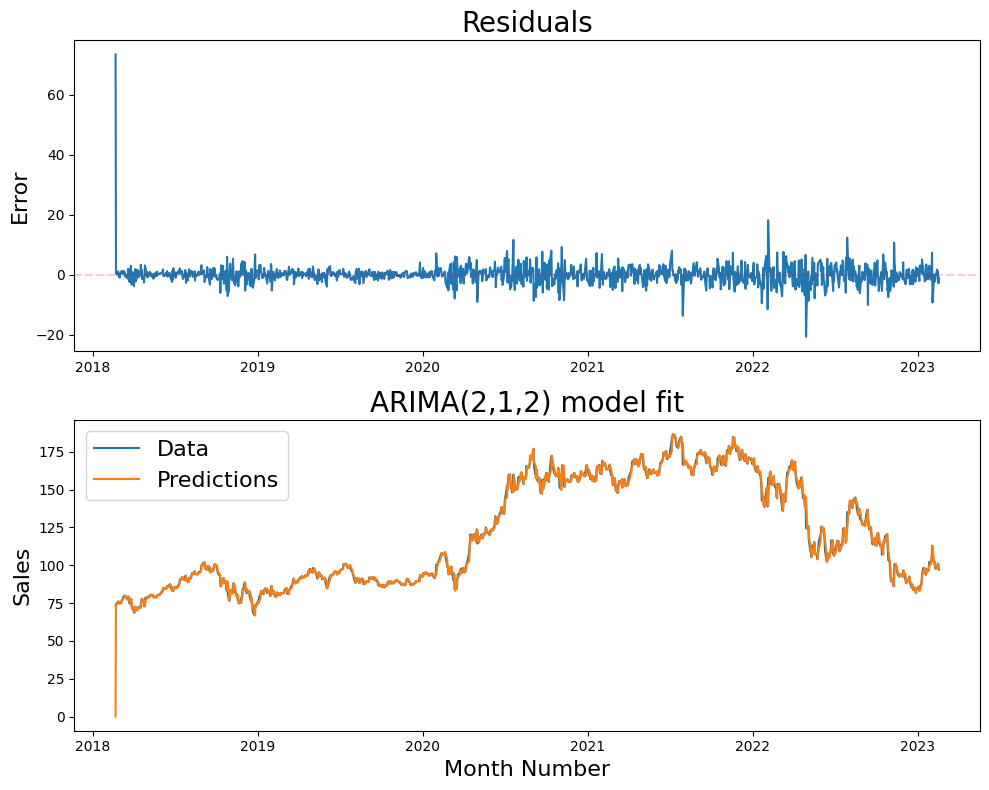

In [45]:
#get prediction start and end dates
test_data_Amazon = Amazon_df['Close']

pred_start_date = test_data_Amazon.index[0]
pred_end_date = test_data_Amazon.index[-1]

#get the predictions and residuals
predictions_Amazon = best_arima_model.fit().predict(start=pred_start_date, end=pred_end_date)
residuals_Amazon = test_data_Amazon - predictions_Amazon

# Create figure and axes
fig = plt.figure(figsize=(10, 8))

# First subplot for residuals
plt.subplot(2, 1, 1)
plt.plot(residuals_Amazon)
plt.title('Residuals', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)

# Second subplot for data and predictions
plt.subplot(2, 1, 2)
plt.plot(test_data_Amazon, label='Data')
plt.plot(predictions_Amazon, label='Predictions')
plt.legend(fontsize=16)
plt.title('ARIMA(2,1,2) model fit', fontsize=20)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Month Number', fontsize=16)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [46]:
def calculate_forecast_summary(predictions, actual_values):
    # Calculate accuracy metrics
    mape = np.mean(np.abs(predictions - actual_values) / np.abs(actual_values))  # MAPE
    me = np.mean(predictions - actual_values)  # ME
    mae = np.mean(np.abs(predictions - actual_values))  # MAE
    mpe = np.mean((predictions - actual_values) / actual_values)  # MPE
    rmse = np.sqrt(np.mean((predictions - actual_values) ** 2))  # RMSE
    corr = np.corrcoef(predictions, actual_values)[0, 1]  # correlation coefficient
    mins = np.amin(np.vstack([predictions, actual_values]), axis=0)
    maxs = np.amax(np.vstack([predictions, actual_values]), axis=0)
    minmax = 1 - np.mean(mins / maxs)  # minmax normalization

    return {
        'mape': mape, 'me': me, 'mae': mae,
        'mpe': mpe, 'rmse': rmse, 'corr': corr, 'minmax': minmax
    }

In [47]:
calculate_forecast_summary(predictions_Amazon, test_data_Amazon)

{'mape': np.float64(0.016931563361968164),
 'me': np.float64(-0.0770783695805422),
 'mae': np.float64(1.9760998010140356),
 'mpe': np.float64(-0.0007597542001993602),
 'rmse': np.float64(3.4377142885862564),
 'corr': np.float64(0.9951401775651083),
 'minmax': np.float64(0.016666924422048535)}

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
<ipython-input-48-55523b51879f>:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=last_idx + pd.offsets.MonthEnd(1), periods=n_forecast, freq='M')
<ipython-input-48-55523b51879f>:27: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax.plot(forecast_index, predicted_mean[-n_forecast:], 'k--', label

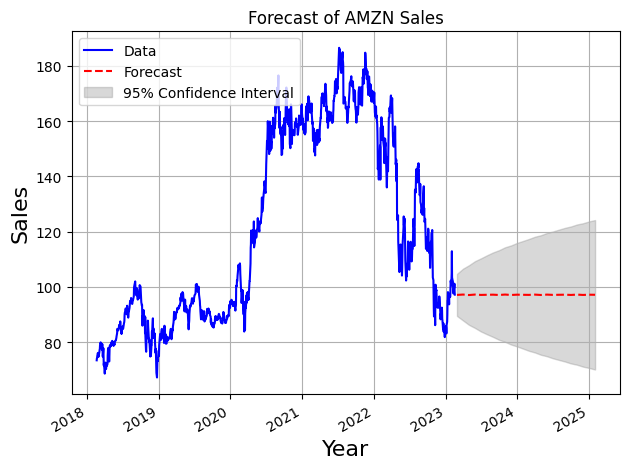

In [48]:
# forecast version 1: get_prediction()

n_forecast = 24 #24 months


amzn_predict = best_arima_fit.get_prediction(end=model.nobs + n_forecast)
# Get predicted mean (includes in-sample and forecast)
predicted_mean = amzn_predict.predicted_mean

forecast_conf_int = amzn_predict.conf_int()

# Create forecast index that starts after the last date in your original data
last_idx = Amazon_df.index[-1]
forecast_index = pd.date_range(start=last_idx + pd.offsets.MonthEnd(1), periods=n_forecast, freq='M')

# Extract the lower and upper bounds from the forecast confidence interval
lower_bound = forecast_conf_int.iloc[:, 0]  # lower bound
upper_bound = forecast_conf_int.iloc[:, 1]  # upper bound



# plot
fig, ax = plt.subplots()
Amazon_df['Close'].plot(ax=ax, label='Data', color='blue')

# Plot forecast (only last n_forecast points)
ax.plot(forecast_index, predicted_mean[-n_forecast:], 'k--', label='Forecast',color='red')

# # Plot confidence interval boundaries
ax.fill_between(forecast_index,
                lower_bound[-n_forecast:], upper_bound[-n_forecast:],
                color='grey',
                alpha=0.3,
                label='95% Confidence Interval')

# Labels and formatting
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.title('Forecast of AMZN Sales')
plt.legend(fontsize=10,loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [49]:
# Generate the forecast
forecast_results = best_arima_fit.get_forecast(steps=24)

# Get predicted values and confidence intervals
predicted_mean = forecast_results.predicted_mean
forecast_conf_int = forecast_results.conf_int()

# Generate the forecast index (for plotting)
forecast_index = pd.date_range(start=Amazon_df.index[-1] + pd.DateOffset(months=1), periods=24, freq='M')


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
<ipython-input-49-3c38023b8afb>:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=Amazon_df.index[-1] + pd.DateOffset(months=1), periods=24, freq='M')


In [50]:
# Build forecast DataFrame for plotting
amzn_conf_df = pd.DataFrame({
    'predicted_mean': predicted_mean.values,
    'lower': forecast_conf_int.iloc[:, 0].values,
    'upper': forecast_conf_int.iloc[:, 1].values
}, index=forecast_index)


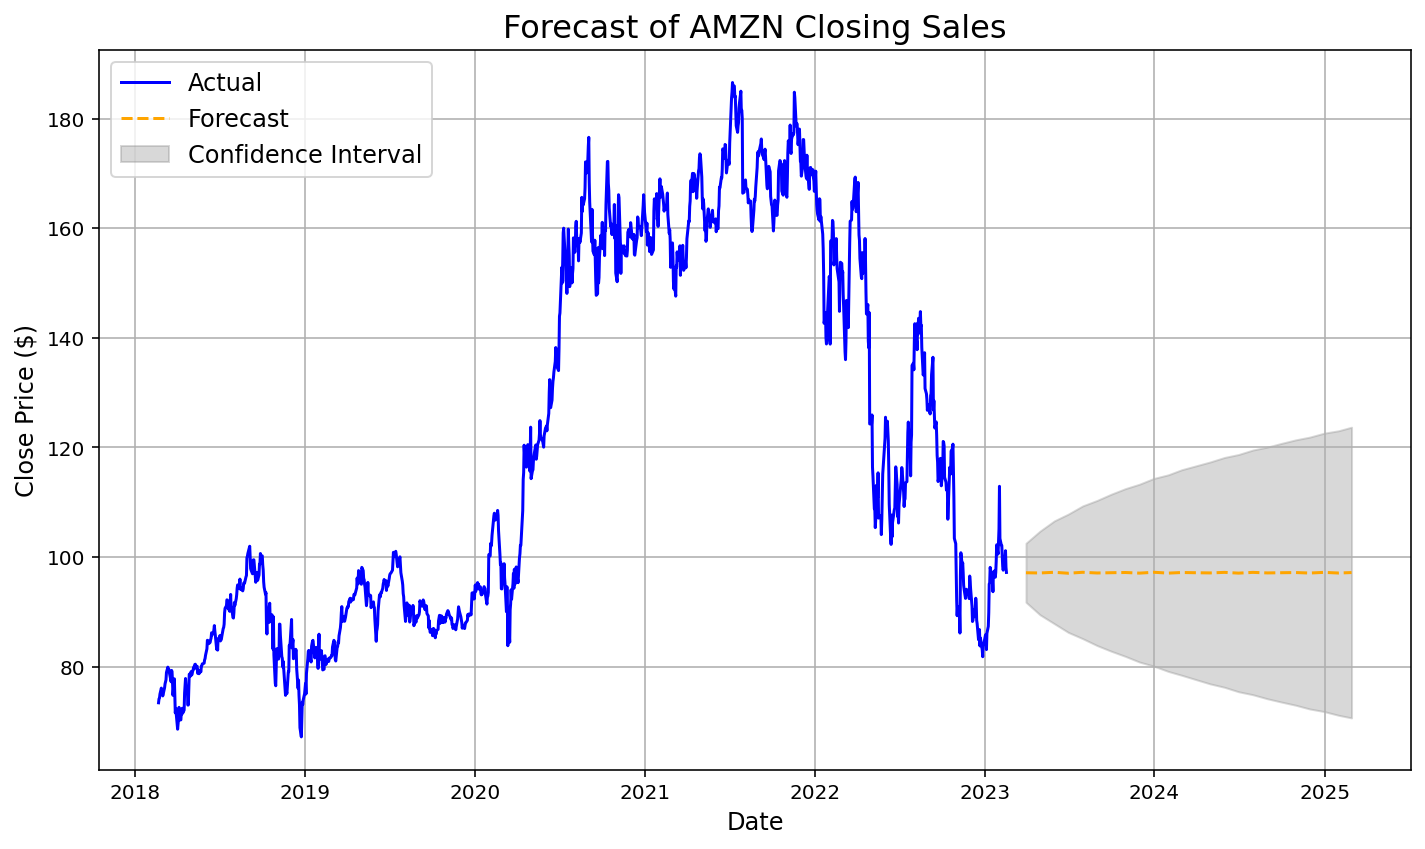

In [51]:
# Create the plot
fig, ax = plt.subplots(figsize=(10,6), dpi=144)

# Plot actual data
ax.plot(Amazon_df['Close'], color='blue', label='Actual')

# Plot predicted mean (forecast)
ax.plot(forecast_index, amzn_conf_df['predicted_mean'], color='orange', linestyle='--', label='Forecast')

# Plot confidence interval boundaries
ax.fill_between(forecast_index,
                amzn_conf_df['lower'],
                amzn_conf_df['upper'],
                color='grey', alpha=0.3, label='Confidence Interval')

# Add labels and title
ax.set_title('Forecast of AMZN Closing Sales', fontsize=16)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Close Price ($)', fontsize=12)

# Update the labels in the legend
ax.legend(loc='upper left', fontsize=12)

# Display the grid and layout
ax.grid(True)
plt.tight_layout()
plt.show()
